In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data
# delta time
dt = 1/10 

# time horizon
x = np.arange(0, 10, dt)

# velocities
V = np.where(x < 2.5, 25.0, 30.0)

# mass (innertia)
m = 1000.0

In [3]:
def pid_cruise(V0: np.array, r: np.array, dt: float, Kp: float = 1.0, Ki: float = 1.0, 
        Kd: float = 1.0, int_window: int = 1, m:float = 1000.0) -> np.array:
    """
    Simulate PID control for a pure integrator system: y[t+1] = y[t] + u[t] * dt

    Parameters:
    ----------
    V0 : float
        Initial system output.
    r : np.array
        Desired output trajectory over time.
    dt : float
        Time step.
    Kp, Ki, Kd : float
        PID gains.
    i_window : int
        Integral window length
    m : float
        System mass (inertia)

    Returns:
    -------
    np.array
        Simulated system output.
    """
    N = len(r)
    v = np.zeros(N)
    u = np.zeros(N)
    e = np.zeros(N)

    v[:V0.shape[0]] = V0
    for i in range(N-1):
        e[i] = r[i] - v[i]

        i_start = max(0, i - int_window)
        integral = np.sum(e[i_start:i]) * dt if i > 0 else 0.0
        derivative = (e[i] - e[i-1]) / dt if i > 0 else 0.0

        u[i] = Kp * e[i] + Ki * integral + Kd * derivative
        a = u[i] / m
        v[i+1] = v[i]+ a * dt
    return v

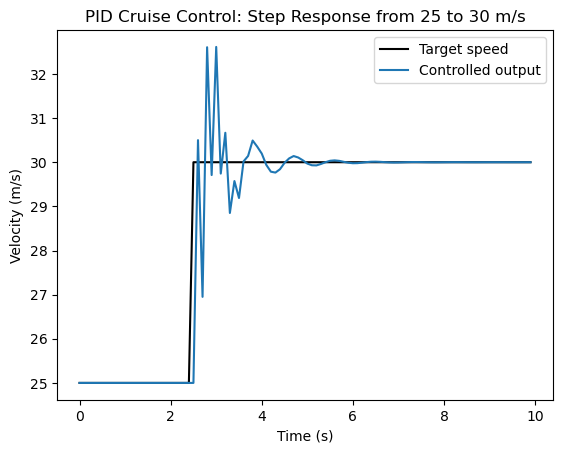

In [5]:
K = np.array([1.0, 40.0, 1.])*m
V0 = np.ones(1) * 25
Yu = pid_cruise(V0, V, dt, *K, int_window=3)
plt.title("PID Cruise Control: Step Response from 25 to 30 m/s")

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.plot(x, V, c="black", label="Target speed")
plt.plot(x, Yu, label="Controlled output")
plt.legend()